<a href="https://colab.research.google.com/github/01star01ek/01star01ek/blob/main/%EC%96%BC%EA%B5%B4%EB%B0%94%EA%BE%B8%EA%B3%A0%20%EC%98%81%EC%83%81%EA%B9%8C%EC%A7%80%20%EB%8C%80%EC%8B%A0%20%EA%B0%84%EB%8B%A8%ED%95%98%EA%B2%8C_deepfake_small_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install dependency

In [1]:
!pip install mediapipe==0.10.11
!pip install opencv-contrib-python flatbuffers==23.5.26 sounddevice==0.4.6 attrs==23.1.0
!pip install torch==2.1.0 torchvision==0.16.0
!pip install dlib opencv-python scikit-image pillow matplotlib imageio gdown tqdm
!pip install ninja tensorboard tensorboardX pyaml pyrallis ftfy
!pip install face-alignment==1.3.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 25.2.10
    Uninstalling flatbuffers-25.2.10:
      Successfully uninstalled flatbuffers-25.2.10
  Attempting uninstall: attrs
    Found existing installation: attrs 25.3.0
    Uninstalling attrs-25.3.0:
      Successfully uninstalled attrs-25.3.0
  Attempting uninstall: sounddevice
    Found existing installation: sounddevice 0.5.2
    Uninstalling sounddevice-0.5.2:
      Successfully uninstalled sounddevice-0.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires flatbuffers>=24.3.25, but you have flatbuffers 23.5.26 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.1 M

In [2]:
!pip install numpy==1.26.4 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 78.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.18.0 requires flatbuffers>=24.3.25, but you have flatbuffers 23.5.26 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
!mkdir -p /content/extract_frames
!mkdir -p /content/input_videos
!mkdir -p /content/alignmented_frame
!mkdir -p /content/alignmented_frame_aligned
!mkdir -p /content/alignmented_frame_croped
!mkdir -p /content/alignmented_frame_transforms

#git hub & model install

In [2]:
!git clone https://github.com/yuval-alaluf/stylegan3-editing.git

fatal: destination path 'stylegan3-editing' already exists and is not an empty directory.


## models

In [3]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 -P /content/pretrained_models/
!bzip2 -d /content/pretrained_models/shape_predictor_68_face_landmarks.dat.bz2

--2025-06-20 02:35:40--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-06-20 02:35:40--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘/content/pretrained_models/shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  38.3MB/s    in 1.6s    

2025-06-20 02:35:42 (38.3 MB/s) - ‘/content/pretrained_models/shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file /content/pretrained_models/shape_predictor_68_face_landmarks.dat already exists.


In [4]:
!gdown --id 1z_cB187QOc6aqVBdLvYvBjoc93-_EuRm -O /content/pretrained_models/restyle_e4e_sg3.pt
!gdown --id 13q6m-bpe3Ws9en9y45JEx2PHQirStt8N -O /content/pretrained_models/stylegan3-ffhq-1024x1024.pt
!gdown --id 1KW7bjndL3QG3sxBbZxreGHigcCCpsDgn -O /content/pretrained_models/model_ir_se50.pth

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1z_cB187QOc6aqVBdLvYvBjoc93-_EuRm
From (redirected): https://drive.google.com/uc?id=1z_cB187QOc6aqVBdLvYvBjoc93-_EuRm&confirm=t&uuid=ded2c488-64ac-4813-bdfa-e326999a9cc1
To: /content/pretrained_models/restyle_e4e_sg3.pt
100% 809M/809M [00:11<00:00, 71.4MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=13q6m-bpe3Ws9en9y45JEx2PHQirStt8N
From (redirected): https://drive.google.com/uc?id=13q6m-bpe3Ws9en9y45JEx2PHQirStt8N&confirm=t&uuid=6288f3fa-5e19-4a33-89aa-efe6e7924f73
To:

In [5]:
!mkdir -p /content/stylegan3-editing/pretrained_models
!cp /content/pretrained_models/shape_predictor_68_face_landmarks.dat /content/stylegan3-editing/pretrained_models/

# preprocess frames

In [2]:
#@title 단일 프로세스 프레임 추출 코드
import cv2
import os
from glob import glob
from tqdm import tqdm

video_dir = "/content/input_videos"  #@param {type:"string"}
output_base = "/content/extract_frames"  #@param {type:"string"}
extract_per_sec = 7  #@param {type:"integer"}

os.makedirs(output_base, exist_ok=True)

def extract_video_frames(video_path):
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    output_dir = os.path.join(output_base, video_name)
    os.makedirs(output_dir, exist_ok=True)

    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    interval = max(1, int(fps // extract_per_sec))

    frame_idx = 0
    frame_list = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_idx % interval == 0:
            frame_list.append(frame)
        frame_idx += 1

    cap.release()

    # 여기서 한 번에 저장!
    for saved_idx, frame in enumerate(frame_list):
        frame_path = os.path.join(output_dir, f"key_{saved_idx:04d}.jpg")
        cv2.imwrite(frame_path, frame)

    return f"{video_name}: {len(frame_list)} frames saved"

# 실행
video_paths = glob(os.path.join(video_dir, "*.mp4"))
print(f"🎬 총 {len(video_paths)}개의 영상 처리 시작")

for video_path in tqdm(video_paths, desc="📦 Processing videos"):
    msg = extract_video_frames(video_path)

🎬 총 4개의 영상 처리 시작


📦 Processing videos: 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]


In [3]:
#@title 피치 제한 강화 + 눈뜸 50% 기준 + KeyError 해결 코드
import cv2, os, math, numpy as np, pandas as pd
from glob import glob
from tqdm import tqdm
import mediapipe as mp

# MediaPipe 초기화
mp_face_mesh = mp.solutions.face_mesh
FACE_MESH = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.7,
    min_tracking_confidence=0.5
)

# 눈 좌표 인덱스
LEFT_EYE_IDX = [
    33, 7, 163, 144, 145, 153, 154, 155, 133, 173, 157, 158, 159, 160, 161, 246,
    33, 173, 157, 158, 159, 160, 161, 246, 33
]
RIGHT_EYE_IDX = [
    362, 398, 384, 385, 386, 387, 388, 466, 263, 249, 390, 373, 374, 380, 381, 382,
    362, 398, 384, 385, 386, 387, 388, 466, 362
]

CORE_LEFT_EYE = [33, 160, 158, 133, 153, 144]
CORE_RIGHT_EYE = [362, 385, 387, 263, 373, 380]
LEFT_EYE_VERTICAL = [159, 145]
RIGHT_EYE_VERTICAL = [386, 374]
POSE_IDX = [1, 152, 33, 263, 61, 291]

# 파라미터 설정 - 피치 제한 강화, 눈뜸 기준 완화
YAW_T = 25
PITCH_T = 25  # 35에서 25로 강화 (피치 관대하게 하지 않음)
HEAD_DOWN_BONUS = 1  # 보너스 최소화
ENABLE_ADAPTIVE_EAR = True
EAR_PERCENTILE_HIGH = 37 # 상위 50%를 눈뜬 상태로 판정 (기존 40%에서 완화)
EAR_PERCENTILE_LOW = 10

model_points = np.array([
    (0.0, 0.0, 0.0),
    (0.0, -330.0, -65.0),
    (-225.0, 170.0, -135.0),
    (225.0, 170.0, -135.0),
    (-150.0, -150.0, -125.0),
    (150.0, -150.0, -125.0)
], dtype="double")

def get_mediapipe_landmarks(img):
    h, w = img.shape[:2]
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    res = FACE_MESH.process(rgb)
    if not res.multi_face_landmarks:
        return None
    lm = res.multi_face_landmarks[0]
    coords = np.array([[p.x * w, p.y * h] for p in lm.landmark])
    return coords

def estimate_pose_mediapipe(landmarks, img_shape):
    image_points = landmarks[POSE_IDX]
    focal = img_shape[1]
    center = (img_shape[1]/2, img_shape[0]/2)
    cam = np.array([[focal, 0, center[0]], [0, focal, center[1]], [0, 0, 1]], dtype="double")
    dist = np.zeros((4,1))
    success, rv, _ = cv2.solvePnP(model_points, image_points, cam, dist)
    return rv if success else None

def rotation_vector_to_euler(rv):
    rmat, _ = cv2.Rodrigues(rv)
    proj = np.hstack((rmat, np.zeros((3,1))))
    angles = cv2.decomposeProjectionMatrix(proj)[6]
    pitch = math.degrees(math.asin(math.sin(math.radians(angles[1][0]))))
    yaw   = math.degrees(math.asin(math.sin(math.radians(angles[2][0]))))
    roll  = -math.degrees(math.asin(math.sin(math.radians(angles[0][0]))))
    return pitch, yaw, roll

def eye_aspect_ratio(eye):
    A = np.linalg.norm(eye[1] - eye[5])
    B = np.linalg.norm(eye[2] - eye[4])
    C = np.linalg.norm(eye[0] - eye[3])
    return (A + B) / (2.0 * C)

def enhanced_eye_aspect_ratio(landmarks, is_left=True):
    if is_left:
        outer = landmarks[33]
        inner = landmarks[133]
        v1 = np.linalg.norm(landmarks[159] - landmarks[145])
        v2 = np.linalg.norm(landmarks[158] - landmarks[153])
        v3 = np.linalg.norm(landmarks[160] - landmarks[144])
    else:
        outer = landmarks[362]
        inner = landmarks[263]
        v1 = np.linalg.norm(landmarks[386] - landmarks[374])
        v2 = np.linalg.norm(landmarks[385] - landmarks[373])
        v3 = np.linalg.norm(landmarks[387] - landmarks[380])

    horizontal = np.linalg.norm(outer - inner)
    avg_vertical = (v1 + v2 + v3) / 3.0
    return avg_vertical / horizontal

def calculate_adaptive_ear_thresholds(all_ear_values):
    """영상별 적응형 EAR 임계값 계산 - 50% 기준 적용"""
    if len(all_ear_values) < 5:
        return {
            'high_threshold': 0.23,
            'medium_threshold': 0.18,
            'low_threshold': 0.15,
            'min_threshold': 0.12
        }

    ear_array = np.array(all_ear_values)

    # 50% 기준으로 임계값 설정
    high_threshold = np.percentile(ear_array, 100 - EAR_PERCENTILE_HIGH)  # 상위 50%
    medium_threshold = np.percentile(ear_array, 100 - EAR_PERCENTILE_HIGH * 1.2)  # 상위 60%
    low_threshold = np.percentile(ear_array, 100 - EAR_PERCENTILE_HIGH * 1.5)  # 상위 75%
    min_threshold = np.percentile(ear_array, EAR_PERCENTILE_LOW)  # 하위 10%

    # 최소값 보장
    high_threshold = max(high_threshold, 0.16)  # 더 관대하게
    medium_threshold = max(medium_threshold, 0.13)
    low_threshold = max(low_threshold, 0.10)
    min_threshold = max(min_threshold, 0.07)

    return {
        'high_threshold': high_threshold,
        'medium_threshold': medium_threshold,
        'low_threshold': low_threshold,
        'min_threshold': min_threshold,
        'ear_stats': {
            'mean': np.mean(ear_array),
            'std': np.std(ear_array),
            'min': np.min(ear_array),
            'max': np.max(ear_array),
            'count': len(ear_array)
        }
    }

def is_eye_open_adaptive(landmarks, thresholds, pitch_angle=0):
    """적응형 EAR 기반 눈뜸 판정 - 피치 조정 최소화"""

    left_eye_basic = landmarks[CORE_LEFT_EYE]
    right_eye_basic = landmarks[CORE_RIGHT_EYE]

    basic_left_ear = eye_aspect_ratio(left_eye_basic)
    basic_right_ear = eye_aspect_ratio(right_eye_basic)
    basic_avg_ear = (basic_left_ear + basic_right_ear) / 2.0

    enhanced_left_ear = enhanced_eye_aspect_ratio(landmarks, True)
    enhanced_right_ear = enhanced_eye_aspect_ratio(landmarks, False)
    enhanced_avg_ear = (enhanced_left_ear + enhanced_right_ear) / 2.0

    ear_difference = abs(basic_left_ear - basic_right_ear)

    # 피치 조정 최소화 (관대하게 하지 않음)
    pitch_factor = 1.0
    if pitch_angle > 20:  # 20도 이상에서만 최소 조정
        pitch_factor = max(0.95, 1.0 - (pitch_angle - 20) * 0.005)  # 최대 5%만 완화

    # 적응형 임계값 적용
    adj_high = thresholds['high_threshold'] * pitch_factor
    adj_medium = thresholds['medium_threshold'] * pitch_factor
    adj_low = thresholds['low_threshold'] * pitch_factor
    adj_min = thresholds['min_threshold'] * pitch_factor

    # 4단계 눈뜸 판정
    level_1 = (basic_avg_ear > adj_high and
               enhanced_avg_ear > adj_high * 0.9 and
               basic_left_ear > adj_medium and
               basic_right_ear > adj_medium and
               ear_difference < 0.08)

    level_2 = (basic_avg_ear > adj_medium and
               enhanced_avg_ear > adj_medium * 0.8 and
               basic_left_ear > adj_low and
               basic_right_ear > adj_low and
               ear_difference < 0.12)

    level_3 = (basic_avg_ear > adj_low and
               basic_left_ear > adj_min and
               basic_right_ear > adj_min and
               ear_difference < 0.15)

    level_4 = (basic_avg_ear > adj_min and
               basic_left_ear > adj_min * 0.8 and
               basic_right_ear > adj_min * 0.8)

    # 레벨별 점수 부여
    if level_1:
        eye_level = 4
    elif level_2:
        eye_level = 3
    elif level_3:
        eye_level = 2
    elif level_4:
        eye_level = 1
    else:
        eye_level = 0

    return eye_level, {
        'basic_ear': basic_avg_ear,
        'enhanced_ear': enhanced_avg_ear,
        'left_ear': basic_left_ear,
        'right_ear': basic_right_ear,
        'ear_diff': ear_difference,
        'eye_level': eye_level,
        'pitch_factor': pitch_factor,
        'thresholds_used': {
            'high': adj_high,
            'medium': adj_medium,
            'low': adj_low,
            'min': adj_min
        }
    }

def frontal_score_strict_pitch(c):
    """피치 제한 강화된 정면성 평가 함수"""

    yaw_angle = abs(c['yaw'])
    pitch_angle = c['pitch']

    # 엄격한 각도 제한 (피치 관대하게 하지 않음)
    if yaw_angle > YAW_T:  # 25도
        return -1000
    if abs(pitch_angle) > PITCH_T:  # ±25도 (엄격)
        return -1000

    # 기본 페널티 (피치에 더 큰 가중치)
    yaw_penalty = yaw_angle * 0.8
    pitch_penalty = abs(pitch_angle) * 1.2  # 피치 페널티 증가

    # 고개 숙임 보너스 최소화
    head_down_bonus = 0
    if -15 <= pitch_angle <= -5:  # 아주 제한적인 범위에서만
        head_down_bonus = HEAD_DOWN_BONUS * 0.5  # 보너스도 절반으로

    # 눈뜸 레벨 보너스
    eye_level = c.get('eye_level', 0)
    eye_bonus = eye_level * 12  # 눈뜸이 더 중요

    bonus = eye_bonus + (head_down_bonus if pitch_angle < 0 else 0)

    return -(0.5 * yaw_penalty + 0.5 * pitch_penalty) + bonus

def calculate_final_quality_score(pitch, yaw, eye_level, ear_details):
    """최종 품질 점수 계산 - 피치 페널티 강화"""

    # 각도 점수 (피치에 더 큰 페널티)
    yaw_score = max(0, 100 - abs(yaw) * 2.0)
    pitch_score = max(0, 100 - abs(pitch) * 2.5)  # 피치 페널티 증가
    angle_score = (yaw_score + pitch_score) / 2

    # 눈뜸 레벨 점수 (50% 기준이므로 더 관대)
    eye_score = eye_level * 25

    # EAR 품질 점수
    ear_quality = min(100, ear_details['basic_ear'] * 300)

    # 종합 점수 (눈뜸 비중 증가)
    total_score = (
        angle_score * 0.3 +    # 각도 30%
        eye_score * 0.5 +      # 눈뜸 50% (증가)
        ear_quality * 0.2      # EAR 품질 20%
    )

    return total_score

# 경로 설정
INPUT_ROOT = "/content/extract_frames"
OUTPUT_ROOT = "/content/alignmented_frame"
os.makedirs(OUTPUT_ROOT, exist_ok=True)

file_ext = ".jpg"
video_dirs = [d for d in os.listdir(INPUT_ROOT) if os.path.isdir(os.path.join(INPUT_ROOT, d))]
missing_videos = []
detailed_log = []
best_images = []
best_names = []

print(f"📦 총 {len(video_dirs)}개 영상 처리 시작")
print(f"🎯 눈뜸 기준: 상위 {EAR_PERCENTILE_HIGH}% (50% 기준으로 완화)")
print(f"📐 각도 제한: Yaw ±{YAW_T}°, Pitch ±{PITCH_T}° (피치 제한 강화)")
print(f"🎁 고개 숙임 보너스: {HEAD_DOWN_BONUS}점 (최소화)")

for video_name in tqdm(video_dirs, desc="🎯 Strict pitch + 50% eye threshold"):
    input_dir = os.path.join(INPUT_ROOT, video_name)

    # 1단계: 모든 프레임의 EAR 값 수집
    all_ear_values = []
    frame_data = []

    for f in sorted(os.listdir(input_dir)):
        if not f.lower().endswith(file_ext):
            continue

        full_path = os.path.join(input_dir, f)
        img = cv2.imread(full_path)
        if img is None:
            continue

        lm = get_mediapipe_landmarks(img)
        if lm is None:
            continue

        rv = estimate_pose_mediapipe(lm, img.shape)
        if rv is None:
            continue

        pitch, yaw, _ = rotation_vector_to_euler(rv)

        # 엄격한 각도 제한
        if abs(yaw) > YAW_T * 1.5 or abs(pitch) > PITCH_T * 1.5:
            continue

        # EAR 계산
        left_eye = lm[CORE_LEFT_EYE]
        right_eye = lm[CORE_RIGHT_EYE]
        left_ear = eye_aspect_ratio(left_eye)
        right_ear = eye_aspect_ratio(right_eye)
        avg_ear = (left_ear + right_ear) / 2.0

        all_ear_values.append(avg_ear)

        # 프레임 데이터 저장
        x1, y1 = lm[:,0].min(), lm[:,1].min()
        x2, y2 = lm[:,0].max(), lm[:,1].max()
        face_area = (x2 - x1) * (y2 - y1)
        cx, cy = (x1 + x2) / 2, (y1 + y2) / 2

        frame_data.append({
            'img': img,
            'filename': f,
            'landmarks': lm,
            'pitch': pitch,
            'yaw': yaw,
            'avg_ear': avg_ear,
            'cx': cx,
            'cy': cy,
            'face_area': face_area
        })

    if not all_ear_values:
        missing_videos.append(video_name)
        detailed_log.append({
            'video_name': video_name,
            'total_frames': 0,
            'selected': False,
            'selection_level': 0,  # KeyError 방지를 위해 추가
            'reason': 'No valid frames found'
        })
        continue

    # 2단계: 적응형 임계값 계산 (50% 기준)
    thresholds = calculate_adaptive_ear_thresholds(all_ear_values)

    # 3단계: 4단계 후보 분류
    level_4_candidates = []
    level_3_candidates = []
    level_2_candidates = []
    level_1_candidates = []

    for frame in frame_data:
        # 엄격한 피치 제한 적용
        if abs(frame['pitch']) > PITCH_T:
            continue

        eye_level, eye_details = is_eye_open_adaptive(
            frame['landmarks'], thresholds, abs(frame['pitch'])
        )

        if eye_level == 0:
            continue

        candidate = {
            'img': frame['img'],
            'filename': frame['filename'],
            'pitch': frame['pitch'],
            'yaw': frame['yaw'],
            'cx': frame['cx'],
            'cy': frame['cy'],
            'face_area': frame['face_area'],
            'w': frame['img'].shape[1],
            'h': frame['img'].shape[0],
            'eye_level': eye_level,
            'eye_details': eye_details,
            'quality_score': calculate_final_quality_score(
                frame['pitch'], frame['yaw'], eye_level, eye_details
            )
        }

        if eye_level == 4:
            level_4_candidates.append(candidate)
        elif eye_level == 3:
            level_3_candidates.append(candidate)
        elif eye_level == 2:
            level_2_candidates.append(candidate)
        else:
            level_1_candidates.append(candidate)

    # 4단계: 최적 프레임 선택
    best_img = None
    best_filename = None
    selection_reason = "No suitable frames"
    selection_level = 0

    if level_4_candidates:
        best = max(level_4_candidates, key=frontal_score_strict_pitch)
        best_img = best['img']
        best_filename = best['filename']
        selection_reason = f"Level 4: Selected from {len(level_4_candidates)} highest quality candidates"
        selection_level = 4

    elif level_3_candidates:
        best = max(level_3_candidates, key=frontal_score_strict_pitch)
        best_img = best['img']
        best_filename = best['filename']
        selection_reason = f"Level 3: Selected from {len(level_3_candidates)} high quality candidates"
        selection_level = 3

    elif level_2_candidates:
        best = max(level_2_candidates, key=frontal_score_strict_pitch)
        best_img = best['img']
        best_filename = best['filename']
        selection_reason = f"Level 2: Selected from {len(level_2_candidates)} medium quality candidates"
        selection_level = 2

    elif level_1_candidates:
        best = max(level_1_candidates, key=lambda x: x['quality_score'])
        best_img = best['img']
        best_filename = best['filename']
        selection_reason = f"Level 1: Selected from {len(level_1_candidates)} minimum quality candidates"
        selection_level = 1

    elif frame_data:
        # 최후의 수단: 가장 품질 좋은 프레임 무조건 선택
        best_frame = max(frame_data, key=lambda x: x['avg_ear'])
        best_img = best_frame['img']
        best_filename = best_frame['filename']
        selection_reason = f"Emergency: Selected best EAR frame ({best_frame['avg_ear']:.3f})"
        selection_level = 0

    # KeyError 방지를 위한 안전한 로그 기록
    detailed_log.append({
        'video_name': video_name,
        'total_frames': len(frame_data),
        'level_4_candidates': len(level_4_candidates),
        'level_3_candidates': len(level_3_candidates),
        'level_2_candidates': len(level_2_candidates),
        'level_1_candidates': len(level_1_candidates),
        'selected': best_filename is not None,
        'selection_level': selection_level,  # 항상 포함
        'best_filename': best_filename,
        'reason': selection_reason,
        'ear_thresholds': thresholds,
        'quality_score': best.get('quality_score', 0) if 'best' in locals() else 0
    })

    # 프레임 저장
    if best_img is not None:
        save_path = os.path.join(OUTPUT_ROOT, f"{video_name}.jpg")
        cv2.imwrite(save_path, best_img)

        if selection_level <= 1:
            print(f"⚠️  {video_name}: Low quality selection (Level {selection_level})")
    else:
        missing_videos.append(video_name)

# 결과 저장
if missing_videos:
    df_missing = pd.DataFrame(missing_videos, columns=["video_name"])
    df_missing.to_csv("no_frame_found.csv", index=False)
    print(f"❗ {len(missing_videos)}개 영상에서 프레임을 찾지 못함")

df_log = pd.DataFrame(detailed_log)
df_log.to_csv("strict_pitch_50percent_eye_log.csv", index=False)
print(f"📊 처리 결과 저장: strict_pitch_50percent_eye_log.csv")

# KeyError 방지된 안전한 통계 출력
success_rate = (len(video_dirs) - len(missing_videos)) / len(video_dirs) * 100 if video_dirs else 0

# .get() 메서드 사용으로 KeyError 방지
level_4_usage = sum(1 for log in detailed_log if log.get('selection_level', 0) == 4)
level_3_usage = sum(1 for log in detailed_log if log.get('selection_level', 0) == 3)
level_2_usage = sum(1 for log in detailed_log if log.get('selection_level', 0) == 2)
level_1_usage = sum(1 for log in detailed_log if log.get('selection_level', 0) == 1)
emergency_usage = sum(1 for log in detailed_log if log.get('selection_level', 0) == 0)

print(f"✅ 성공률: {success_rate:.1f}% ({len(video_dirs) - len(missing_videos)}/{len(video_dirs)})")
print(f"🏆 Level 4 (최고품질): {level_4_usage}개")
print(f"🥈 Level 3 (고품질): {level_3_usage}개")
print(f"🥉 Level 2 (중품질): {level_2_usage}개")
print(f"📉 Level 1 (최소품질): {level_1_usage}개")
print(f"🚨 Emergency (강제선택): {emergency_usage}개")

print(f"\n📈 품질 분포:")
print(f"   - 고품질 이상 (Level 3+): {(level_4_usage + level_3_usage) / len(video_dirs) * 100:.1f}%")
print(f"   - 중품질 이상 (Level 2+): {(level_4_usage + level_3_usage + level_2_usage) / len(video_dirs) * 100:.1f}%")
print(f"   - 최소품질 이상 (Level 1+): {(len(video_dirs) - emergency_usage) / len(video_dirs) * 100:.1f}%")

print(f"\n🎯 설정 요약:")
print(f"   - 피치 제한: ±{PITCH_T}° (엄격)")
print(f"   - 눈뜸 기준: 상위 {EAR_PERCENTILE_HIGH}% (관대)")
print(f"   - 고개 숙임 보너스: {HEAD_DOWN_BONUS}점 (최소)")


📦 총 4개 영상 처리 시작
🎯 눈뜸 기준: 상위 37% (50% 기준으로 완화)
📐 각도 제한: Yaw ±25°, Pitch ±25° (피치 제한 강화)
🎁 고개 숙임 보너스: 1점 (최소화)


🎯 Strict pitch + 50% eye threshold: 100%|██████████| 4/4 [00:06<00:00,  1.60s/it]

📊 처리 결과 저장: strict_pitch_50percent_eye_log.csv
✅ 성공률: 100.0% (4/4)
🏆 Level 4 (최고품질): 2개
🥈 Level 3 (고품질): 1개
🥉 Level 2 (중품질): 1개
📉 Level 1 (최소품질): 0개
🚨 Emergency (강제선택): 0개

📈 품질 분포:
   - 고품질 이상 (Level 3+): 75.0%
   - 중품질 이상 (Level 2+): 100.0%
   - 최소품질 이상 (Level 1+): 100.0%

🎯 설정 요약:
   - 피치 제한: ±25° (엄격)
   - 눈뜸 기준: 상위 37% (관대)
   - 고개 숙임 보너스: 1점 (최소)


In [4]:
import numpy
print(numpy.__version__)

1.26.4


# image crop

In [5]:
%cd /content/stylegan3-editing

/content/stylegan3-editing


In [6]:
import sys
sys.path.append('/content/stylegan3-editing')

In [7]:
import time
base_raw_root = "/content/alignmented_frame"
aligned_root = f"{base_raw_root}_aligned"
cropped_root = f"{base_raw_root}_croped"
transform_root = f"{base_raw_root}_transforms"

print("🚀 Aligning all images...")
# 실행 명령어에 PYTHONPATH를 추가하여 모듈을 찾을 경로를 알려줍니다.
!PYTHONPATH=/content/stylegan3-editing python /content/stylegan3-editing/prepare_data/preparing_faces_parallel.py \
    --mode align \
    --root_path "{base_raw_root}"

time.sleep(3)

print("🔁 Cropping all images...")
# 여기도 동일하게 추가합니다.
!PYTHONPATH=/content/stylegan3-editing python /content/stylegan3-editing/prepare_data/preparing_faces_parallel.py \
    --mode crop \
    --root_path "{base_raw_root}" \
    --random_shift 0.05

time.sleep(3)

print("🔁 Computing transforms for all images...")
# 여기도 동일하게 추가합니다.
!PYTHONPATH=/content/stylegan3-editing python /content/stylegan3-editing/prepare_data/compute_landmarks_transforms.py \
    --raw_root "{base_raw_root}" \
    --aligned_root "{aligned_root}" \
    --cropped_root "{cropped_root}" \
    --output_root "{transform_root}"


🚀 Aligning all images...
1
Running on 4 paths
Here we goooo
	ForkPoolWorker-1 is starting to extract on #4 images
	Done!
Mischief managed in -2.8514950275421143s
🔁 Cropping all images...
1
Running on 4 paths
Here we goooo
	ForkPoolWorker-1 is starting to extract on #4 images
	Done!
Mischief managed in -2.6253082752227783s
🔁 Computing transforms for all images...
Computing landmarks transforms...
100% 4/4 [00:08<00:00,  2.13s/it]


In [ ]:
import os

# 디렉토리 설정
input_root = "/content/alignmented_frame_croped"
transforms_root = "/content/alignmented_frame_transforms/landmarks_transforms.npy"
output_root = "/content/experiments/restyle_e4e_sg3"
ckpt_path = "/content/pretrained_models/restyle_e4e_sg3.pt"
script_path = "/content/stylegan3-editing/inversion/scripts/inference_iterative.py"

# output 디렉토리 생성
os.makedirs(output_root, exist_ok=True)

print("🚀 Inverting video")

!python {script_path} \
    --output_path "{output_root}" \
    --checkpoint_path "{ckpt_path}" \
    --data_path "{input_root}" \
    --test_batch_size 4 \
    --test_workers 4 \
    --n_iters_per_batch 3 \
    --landmarks_transforms_path "{transforms_root}"

🚀 Inverting video
Loading ReStyle e4e from checkpoint: /content/pretrained_models/restyle_e4e_sg3.pt
Loading StyleGAN3 generator from path: None
Done!
Model successfully loaded!
Loading dataset for ffhq_encode
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Setting up PyTorch plugin "filtered_lrelu_plugin"... 

# save CSV

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# 1. Load latent dictionary
latent_path = "/content/experiments/restyle_e4e_sg3/latents.npy"
latent_dict = np.load(latent_path, allow_pickle=True).item()

# 2. 정렬된 파일 리스트 확보
filenames = sorted(latent_dict.keys())

# 3. 각 latent에서 마지막 step → 평균 → (512,)
latents = []
for key in filenames:
    latent = latent_dict[key][-1]  # 마지막 step (18, 512)
    mean_latent = latent.mean(axis=0).astype('float32')  # (512,)
    latents.append(mean_latent)

latents = np.stack(latents)  # shape: (N, 512)

# 4. cosine similarity matrix
sim_matrix = cosine_similarity(latents)  # shape: (N, N)

# 5. 각 query 파일마다 top-3 유사한 match + score 저장
rows = []

for i in range(len(filenames)):
    sims = sim_matrix[i].copy()
    sims[i] = -np.inf  # 자기 자신 제외
    top3_idx = np.argsort(sims)[::-1][:3]
    row = {
        "query": filenames[i],
        "top1": filenames[top3_idx[0]],
        "top2": filenames[top3_idx[1]],
        "top3": filenames[top3_idx[2]],
        "top1val": round(float(sims[top3_idx[0]]), 6),
        "top2val": round(float(sims[top3_idx[1]]), 6),
        "top3val": round(float(sims[top3_idx[2]]), 6),
    }
    rows.append(row)

# 6. Save to CSV
df = pd.DataFrame(rows)
df.to_csv("video_similarity_top3_compact.csv", index=False)

print("✅ Saved to video_similarity_top3_compact.csv")


✅ Saved to video_similarity_top3_compact.csv


📂 Loading original latent vectors...
📁 Preparing input images for inversion...
🚀 Running inversion on generated images...
🔍 Comparing latents...
✅ 비교 결과 저장 완료: /content/original_vs_generated_latent_comparison.csv


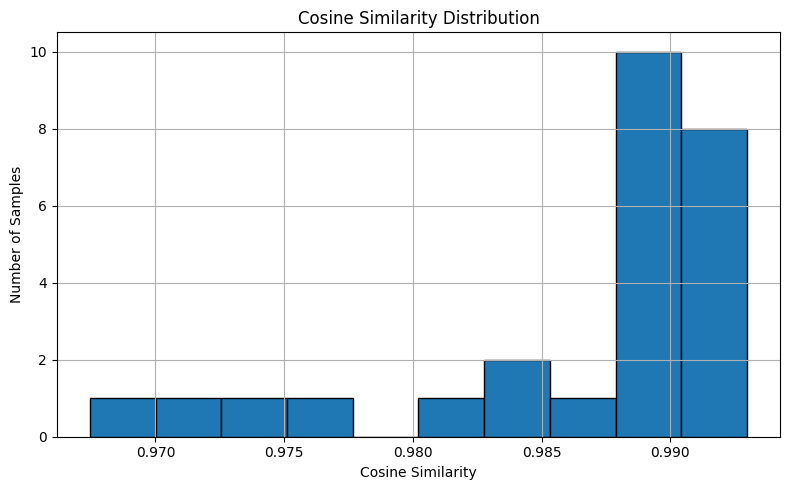

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import subprocess

# === 경로 설정 ===
original_latent_path = "/content/experiments/restyle_e4e_sg3/latents.npy"
generated_image_dir = "/content/experiments/restyle_e4e_sg3/inference_results/0"
temp_input_dir = "/content/temp_comparison/generated_input"
temp_output_dir = "/content/temp_comparison/generated_output"
generated_latent_path = os.path.join(temp_output_dir, "latents.npy")
script_path = "/content/stylegan3-editing/inversion/scripts/inference_iterative.py"
ckpt_path = "/content/pretrained_models/restyle_e4e_sg3.pt"

# === Step 1. 원본 latent 불러오기 ===
print("📂 Loading original latent vectors...")
orig_latent_raw = np.load(original_latent_path, allow_pickle=True).item()
original_latents = {}
for k, v in orig_latent_raw.items():
    key = os.path.splitext(os.path.basename(k))[0]
    final_latent = v[-1]
    original_latents[key] = {
        "mean": final_latent.mean(axis=0).astype("float32"),
        "full": final_latent
    }

# === Step 2. Generated 이미지 latent 재추출 ===
print("📁 Preparing input images for inversion...")
os.makedirs(temp_input_dir, exist_ok=True)
os.makedirs(temp_output_dir, exist_ok=True)

# 이미지 복사
from glob import glob
import shutil
for path in glob(os.path.join(generated_image_dir, "*.jpg")):
    fname = os.path.basename(path)
    new_name = f"0_{fname}"  # prefix 붙이기 (중복 방지)
    shutil.copy(path, os.path.join(temp_input_dir, new_name))

# 인버전 실행
print("🚀 Running inversion on generated images...")
subprocess.run([
    "python", script_path,
    "--output_path", temp_output_dir,
    "--checkpoint_path", ckpt_path,
    "--data_path", temp_input_dir,
    "--test_batch_size", "4",
    "--test_workers", "2",
    "--n_iters_per_batch", "3"
], check=True)

# === Step 3. Generated latent 불러오기 및 비교 ===
print("🔍 Comparing latents...")
gen_latent_dict = np.load(generated_latent_path, allow_pickle=True).item()
results = []

for gen_fname, latent_seq in gen_latent_dict.items():
    _, clean = gen_fname.split("_", 1) if "_" in gen_fname else ("", gen_fname)
    base_name = os.path.splitext(clean)[0]

    if base_name not in original_latents:
        print(f"⚠️ 원본 latent 없음: {base_name}")
        continue

    gen_final = latent_seq[-1]
    gen_mean = gen_final.mean(axis=0).astype("float32")
    orig = original_latents[base_name]

    layer_sims = [cosine_similarity([orig["full"][i]], [gen_final[i]])[0][0]
                  for i in range(gen_final.shape[0])]

    results.append({
        "filename": base_name,
        "cosine_similarity": cosine_similarity([orig["mean"]], [gen_mean])[0][0],
        "euclidean_distance": np.linalg.norm(orig["mean"] - gen_mean),
        "dot_product": np.dot(orig["mean"], gen_mean),
        "coarse_similarity": np.mean(layer_sims[:4]),
        "middle_similarity": np.mean(layer_sims[4:8]),
        "fine_similarity": np.mean(layer_sims[8:]),
        "overall_layer_similarity": np.mean(layer_sims),
    })

# === Step 4. 저장 ===
df = pd.DataFrame(results)
csv_path = "/content/original_vs_generated_latent_comparison.csv"
df.to_csv(csv_path, index=False)
print(f"✅ 비교 결과 저장 완료: {csv_path}")

# === Step 5. 시각화 ===
plt.figure(figsize=(8, 5))
plt.hist(df["cosine_similarity"], bins=10, edgecolor='black')
plt.title("Cosine Similarity Distribution")
plt.xlabel("Cosine Similarity")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 필요한 패키지 설치
import subprocess
import sys

def install_packages():
    """필요한 패키지들을 설치합니다."""
    packages = [
        "insightface",
        "onnxruntime",
        "opencv-python",
        "tqdm"
    ]

    for package in packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✅ {package} 설치 완료")
        except subprocess.CalledProcessError:
            print(f"❌ {package} 설치 실패")
            return False
    return True

# 패키지 설치 실행
print("필요한 패키지들을 설치합니다...")
if not install_packages():
    print("패키지 설치에 실패했습니다. 수동으로 설치해주세요.")
    sys.exit(1)

# 패키지 임포트
import requests
import os
import cv2
import insightface
from insightface.app import FaceAnalysis
from glob import glob
import re
from pathlib import Path
from tqdm import tqdm

class AutoFaceSwapPipeline:
    def __init__(self):
        self.app = None
        self.swapper = None
        self.setup_models()

    def setup_models(self):
        """모델 다운로드 및 초기화"""
        if not self.download_inswapper():
            raise Exception("모델 다운로드에 실패했습니다.")

        print("얼굴 분석 및 교체 모델 준비 중...")
        self.app = FaceAnalysis()
        self.app.prepare(ctx_id=0, det_size=(320, 320))
        self.swapper = insightface.model_zoo.get_model('inswapper_128.onnx')
        print("모델 준비 완료!")

    def download_inswapper(self):
        """인스왑퍼 모델 다운로드"""
        url = "https://civitai.com/api/download/models/85159"
        model_name = 'inswapper_128.onnx'

        if os.path.exists(model_name):
            print(f"'{model_name}' 모델이 이미 존재합니다.")
            return True

        print(f"'{model_name}' 모델 다운로드 중...")
        try:
            response = requests.get(url, stream=True)
            if response.status_code == 200:
                with open(model_name, 'wb') as f:
                    for chunk in response.iter_content(chunk_size=8192):
                        f.write(chunk)
                print("모델 다운로드 완료!")
                return True
            else:
                print(f"다운로드 실패: {response.status_code}")
                return False
        except Exception as e:
            print(f"다운로드 중 오류: {e}")
            return False

    def extract_number_from_filename(self, filename):
        """파일명에서 숫자 추출 (영상과 이미지 매칭용)"""
        # 파일명에서 숫자 패턴 찾기
        numbers = re.findall(r'\d+', os.path.splitext(filename)[0])
        if numbers:
            return int(numbers[0])  # 첫 번째 숫자 사용
        return None

    def get_video_image_pairs(self, video_dir, image_dir):
        """영상과 이미지 파일들을 번호로 매칭"""
        video_files = glob(os.path.join(video_dir, "*.mp4"))
        image_files = glob(os.path.join(image_dir, "*.jpg")) + glob(os.path.join(image_dir, "*.png"))

        # 파일명에서 번호 추출하여 딕셔너리 생성
        video_dict = {}
        for video_path in video_files:
            filename = os.path.basename(video_path)
            number = self.extract_number_from_filename(filename)
            if number is not None:
                video_dict[number] = video_path

        image_dict = {}
        for image_path in image_files:
            filename = os.path.basename(image_path)
            number = self.extract_number_from_filename(filename)
            if number is not None:
                image_dict[number] = image_path

        # 매칭되는 쌍 찾기
        pairs = []
        for number in sorted(set(video_dict.keys()) & set(image_dict.keys())):
            pairs.append({
                'number': number,
                'video_path': video_dict[number],
                'image_path': image_dict[number],
                'video_name': os.path.splitext(os.path.basename(video_dict[number]))[0],
                'image_name': os.path.splitext(os.path.basename(image_dict[number]))[0]
            })

        return pairs

    def process_single_pair(self, video_path, source_image_path, output_dir, frame_interval=5):
        """단일 영상-이미지 쌍 처리"""
        # 소스 이미지에서 얼굴 추출
        source_img = cv2.imread(source_image_path)
        if source_img is None:
            print(f"소스 이미지를 읽을 수 없습니다: {source_image_path}")
            return False, None, None

        source_faces = self.app.get(source_img)
        if not source_faces:
            print(f"소스 이미지에서 얼굴을 찾을 수 없습니다: {source_image_path}")
            return False, None, None

        source_face = source_faces[0]

        # 타겟 비디오 처리
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"타겟 비디오를 열 수 없습니다: {video_path}")
            return False, None, None

        # 비디오 정보
        original_fps = cap.get(cv2.CAP_PROP_FPS)
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        new_fps = original_fps / frame_interval

        print(f"  원본 FPS: {original_fps:.1f} → 새 FPS: {new_fps:.1f}")
        print(f"  총 프레임: {total_frames}, 예상 저장: {total_frames // frame_interval}개")

        # 출력 디렉토리 생성
        os.makedirs(output_dir, exist_ok=True)

        frame_count = 0
        saved_count = 0

        print("  프레임 처리 중...")
        with tqdm(total=total_frames, desc="  진행률") as pbar:
            while True:
                ret, frame = cap.read()
                if not ret:
                    break

                if frame_count % frame_interval == 0:
                    target_faces = self.app.get(frame)
                    if len(target_faces) > 0:
                        try:
                            result_frame = self.swapper.get(frame, target_faces[0], source_face, paste_back=True)
                            cv2.imwrite(os.path.join(output_dir, f'frame_{saved_count:04d}.png'), result_frame)
                            saved_count += 1
                        except Exception as e:
                            print(f"  프레임 {frame_count} 처리 중 오류: {e}")

                frame_count += 1
                pbar.update(1)

        cap.release()
        print(f"  저장된 이미지: {saved_count}개")
        return True, original_fps, new_fps

    def create_video_from_images(self, image_dir, output_video_path, fps):
        """이미지들로 비디오 생성"""
        image_files = sorted(glob(os.path.join(image_dir, 'frame_*.png')))

        if len(image_files) == 0:
            print(f"  이미지 파일이 없습니다: {image_dir}")
            return False

        first_img = cv2.imread(image_files[0])
        if first_img is None:
            return False

        height, width, _ = first_img.shape
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

        if not out.isOpened():
            print(f"  비디오 라이터를 열 수 없습니다: {output_video_path}")
            return False

        print(f"  {len(image_files)}개 이미지로 {fps:.1f}FPS 비디오 생성 중...")
        for img_path in tqdm(image_files, desc="  비디오 생성"):
            img = cv2.imread(img_path)
            if img is not None:
                out.write(img)

        out.release()
        print(f"  비디오 생성 완료: {output_video_path}")
        return True

    def interpolate_video(self, input_video, output_video, target_fps):
        """FFmpeg를 사용한 프레임 보간"""
        print(f"  보간 시작: {target_fps:.1f}FPS로 변환 중...")

        cmd = [
            'ffmpeg', '-i', input_video,
            '-filter:v', f'minterpolate=fps={target_fps}:mi_mode=mci:mc_mode=aobmc:vsbmc=1',
            '-y', output_video
        ]

        try:
            result = subprocess.run(cmd, capture_output=True, text=True)
            if result.returncode == 0:
                print(f"  보간 완료: {output_video}")
                return True
            else:
                print(f"  보간 실패: {result.stderr}")
                return False
        except Exception as e:
            print(f"  보간 중 오류: {e}")
            return False

    def process_all_pairs(self, video_dir="/content/input_videos",
                         image_dir="/content/experiments/restyle_e4e_sg3/inference_results/0",
                         output_base_dir="/content/face_swap_results",
                         frame_interval=5, use_interpolation=True):
        """모든 영상-이미지 쌍 자동 처리"""

        # 매칭되는 쌍 찾기
        pairs = self.get_video_image_pairs(video_dir, image_dir)

        if not pairs:
            print("매칭되는 영상-이미지 쌍을 찾을 수 없습니다!")
            print(f"영상 디렉토리: {video_dir}")
            print(f"이미지 디렉토리: {image_dir}")
            return

        print(f"총 {len(pairs)}개의 매칭 쌍을 찾았습니다!")

        # 기본 출력 디렉토리 생성
        os.makedirs(output_base_dir, exist_ok=True)

        success_count = 0

        for i, pair in enumerate(pairs, 1):
            print(f"\n[{i}/{len(pairs)}] 처리 중...")
            print(f"  영상: {os.path.basename(pair['video_path'])}")
            print(f"  이미지: {os.path.basename(pair['image_path'])}")

            # 개별 출력 디렉토리 생성
            pair_name = f"pair_{pair['number']:03d}_{pair['video_name']}"
            pair_output_dir = os.path.join(output_base_dir, pair_name)
            images_dir = os.path.join(pair_output_dir, "frames")

            try:
                # 1. 얼굴 교체 및 이미지 저장
                success, original_fps, base_fps = self.process_single_pair(
                    pair['video_path'],
                    pair['image_path'],
                    images_dir,
                    frame_interval
                )

                if not success:
                    print(f"  쌍 {pair['number']} 처리 실패")
                    continue

                # 2. 기본 비디오 생성
                base_video_path = os.path.join(pair_output_dir, f"{pair_name}_base.mp4")
                if not self.create_video_from_images(images_dir, base_video_path, base_fps):
                    print(f"  기본 비디오 생성 실패")
                    continue

                # 3. 보간된 비디오 생성 (선택사항)
                if use_interpolation:
                    final_video_path = os.path.join(pair_output_dir, f"{pair_name}_final.mp4")
                    if self.interpolate_video(base_video_path, final_video_path, original_fps):
                        print(f"  최종 결과: {final_video_path}")
                    else:
                        print(f"  보간 실패, 기본 비디오 사용: {base_video_path}")
                else:
                    print(f"  최종 결과: {base_video_path}")

                success_count += 1

            except Exception as e:
                print(f"  쌍 {pair['number']} 처리 중 오류: {e}")
                continue

        print(f"\n🎉 처리 완료! {success_count}/{len(pairs)}개 성공")
        print(f"결과 저장 위치: {output_base_dir}")

# 사용 예시
if __name__ == "__main__":
    # 파이프라인 초기화
    pipeline = AutoFaceSwapPipeline()

    # 설정
    VIDEO_DIR = "/content/input_videos"
    IMAGE_DIR = "/content/experiments/restyle_e4e_sg3/inference_results/0"
    OUTPUT_DIR = "/content/face_swap_results"
    FRAME_INTERVAL = 5  # 5프레임마다 샘플링
    USE_INTERPOLATION = True  # 프레임 보간 사용 여부

    print("=== 자동 Face Swap 파이프라인 시작 ===")
    print(f"영상 디렉토리: {VIDEO_DIR}")
    print(f"이미지 디렉토리: {IMAGE_DIR}")
    print(f"출력 디렉토리: {OUTPUT_DIR}")
    print(f"프레임 간격: {FRAME_INTERVAL}")
    print(f"보간 사용: {'예' if USE_INTERPOLATION else '아니오'}")

    # 모든 쌍 자동 처리
    pipeline.process_all_pairs(
        video_dir=VIDEO_DIR,
        image_dir=IMAGE_DIR,
        output_base_dir=OUTPUT_DIR,
        frame_interval=FRAME_INTERVAL,
        use_interpolation=USE_INTERPOLATION
    )

필요한 패키지들을 설치합니다...
✅ insightface 설치 완료
✅ onnxruntime 설치 완료
✅ opencv-python 설치 완료
✅ tqdm 설치 완료
'inswapper_128.onnx' 모델 다운로드 중...
모델 다운로드 완료!
얼굴 분석 및 교체 모델 준비 중...
download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:03<00:00, 92999.03KB/s]
/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (320, 320)
Applied prov

/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 30.0 → 새 FPS: 6.0
  총 프레임: 529, 예상 저장: 105개
  프레임 처리 중...


  진행률: 100%|██████████| 529/529 [06:50<00:00,  1.29it/s]


  저장된 이미지: 106개
  106개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 106/106 [00:01<00:00, 89.35it/s]


  비디오 생성 완료: /content/face_swap_results/pair_004_0004/pair_004_0004_base.mp4
  보간 시작: 30.0FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_004_0004/pair_004_0004_final.mp4
  최종 결과: /content/face_swap_results/pair_004_0004/pair_004_0004_final.mp4

[2/26] 처리 중...
  영상: 0005.mp4
  이미지: 0005.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 30.0 → 새 FPS: 6.0
  총 프레임: 326, 예상 저장: 65개
  프레임 처리 중...


  진행률: 100%|██████████| 326/326 [04:12<00:00,  1.29it/s]


  저장된 이미지: 66개
  66개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 66/66 [00:00<00:00, 79.07it/s]


  비디오 생성 완료: /content/face_swap_results/pair_005_0005/pair_005_0005_base.mp4
  보간 시작: 30.0FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_005_0005/pair_005_0005_final.mp4
  최종 결과: /content/face_swap_results/pair_005_0005/pair_005_0005_final.mp4

[3/26] 처리 중...
  영상: 0006.mp4
  이미지: 0006.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 30.0 → 새 FPS: 6.0
  총 프레임: 459, 예상 저장: 91개
  프레임 처리 중...


  진행률: 100%|██████████| 459/459 [05:48<00:00,  1.32it/s]


  저장된 이미지: 92개
  92개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 92/92 [00:01<00:00, 70.76it/s]


  비디오 생성 완료: /content/face_swap_results/pair_006_0006/pair_006_0006_base.mp4
  보간 시작: 30.0FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_006_0006/pair_006_0006_final.mp4
  최종 결과: /content/face_swap_results/pair_006_0006/pair_006_0006_final.mp4

[4/26] 처리 중...
  영상: 0007.mp4
  이미지: 0007.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 30.0 → 새 FPS: 6.0
  총 프레임: 534, 예상 저장: 106개
  프레임 처리 중...


  진행률: 100%|██████████| 534/534 [07:04<00:00,  1.26it/s]


  저장된 이미지: 107개
  107개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 107/107 [00:01<00:00, 68.80it/s]


  비디오 생성 완료: /content/face_swap_results/pair_007_0007/pair_007_0007_base.mp4
  보간 시작: 30.0FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_007_0007/pair_007_0007_final.mp4
  최종 결과: /content/face_swap_results/pair_007_0007/pair_007_0007_final.mp4

[5/26] 처리 중...
  영상: 0008.mp4
  이미지: 0008.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 30.0 → 새 FPS: 6.0
  총 프레임: 479, 예상 저장: 95개
  프레임 처리 중...


  진행률: 100%|██████████| 479/479 [06:22<00:00,  1.25it/s]


  저장된 이미지: 96개
  96개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 96/96 [00:01<00:00, 74.28it/s]


  비디오 생성 완료: /content/face_swap_results/pair_008_0008/pair_008_0008_base.mp4
  보간 시작: 30.0FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_008_0008/pair_008_0008_final.mp4
  최종 결과: /content/face_swap_results/pair_008_0008/pair_008_0008_final.mp4

[6/26] 처리 중...
  영상: 0009.mp4
  이미지: 0009.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 30.0 → 새 FPS: 6.0
  총 프레임: 464, 예상 저장: 92개
  프레임 처리 중...


  진행률: 100%|██████████| 464/464 [06:10<00:00,  1.25it/s]


  저장된 이미지: 93개
  93개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 93/93 [00:01<00:00, 74.98it/s]


  비디오 생성 완료: /content/face_swap_results/pair_009_0009/pair_009_0009_base.mp4
  보간 시작: 30.0FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_009_0009/pair_009_0009_final.mp4
  최종 결과: /content/face_swap_results/pair_009_0009/pair_009_0009_final.mp4

[7/26] 처리 중...
  영상: 0010.mp4
  이미지: 0010.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 30.0 → 새 FPS: 6.0
  총 프레임: 520, 예상 저장: 104개
  프레임 처리 중...


  진행률: 100%|██████████| 520/520 [06:48<00:00,  1.27it/s]


  저장된 이미지: 104개
  104개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 104/104 [00:01<00:00, 55.71it/s]


  비디오 생성 완료: /content/face_swap_results/pair_010_0010/pair_010_0010_base.mp4
  보간 시작: 30.0FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_010_0010/pair_010_0010_final.mp4
  최종 결과: /content/face_swap_results/pair_010_0010/pair_010_0010_final.mp4

[8/26] 처리 중...
  영상: 0011.mp4
  이미지: 0011.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 30.0 → 새 FPS: 6.0
  총 프레임: 371, 예상 저장: 74개
  프레임 처리 중...


  진행률: 100%|██████████| 371/371 [04:50<00:00,  1.28it/s]


  저장된 이미지: 73개
  73개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 73/73 [00:00<00:00, 151.50it/s]


  비디오 생성 완료: /content/face_swap_results/pair_011_0011/pair_011_0011_base.mp4
  보간 시작: 30.0FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_011_0011/pair_011_0011_final.mp4
  최종 결과: /content/face_swap_results/pair_011_0011/pair_011_0011_final.mp4

[9/26] 처리 중...
  영상: 0012.mp4
  이미지: 0012.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 30.0 → 새 FPS: 6.0
  총 프레임: 276, 예상 저장: 55개
  프레임 처리 중...


  진행률: 100%|██████████| 276/276 [03:50<00:00,  1.20it/s]


  저장된 이미지: 56개
  56개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 56/56 [00:00<00:00, 139.46it/s]


  비디오 생성 완료: /content/face_swap_results/pair_012_0012/pair_012_0012_base.mp4
  보간 시작: 30.0FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_012_0012/pair_012_0012_final.mp4
  최종 결과: /content/face_swap_results/pair_012_0012/pair_012_0012_final.mp4

[10/26] 처리 중...
  영상: 0013.mp4
  이미지: 0013.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 30.0 → 새 FPS: 6.0
  총 프레임: 400, 예상 저장: 80개
  프레임 처리 중...


  진행률: 100%|██████████| 400/400 [05:21<00:00,  1.24it/s]


  저장된 이미지: 80개
  80개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 80/80 [00:00<00:00, 108.97it/s]


  비디오 생성 완료: /content/face_swap_results/pair_013_0013/pair_013_0013_base.mp4
  보간 시작: 30.0FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_013_0013/pair_013_0013_final.mp4
  최종 결과: /content/face_swap_results/pair_013_0013/pair_013_0013_final.mp4

[11/26] 처리 중...
  영상: 0087.mp4
  이미지: 0087.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 30.0 → 새 FPS: 6.0
  총 프레임: 269, 예상 저장: 53개
  프레임 처리 중...


  진행률: 100%|██████████| 269/269 [03:39<00:00,  1.22it/s]


  저장된 이미지: 54개
  54개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 54/54 [00:00<00:00, 74.85it/s]


  비디오 생성 완료: /content/face_swap_results/pair_087_0087/pair_087_0087_base.mp4
  보간 시작: 30.0FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_087_0087/pair_087_0087_final.mp4
  최종 결과: /content/face_swap_results/pair_087_0087/pair_087_0087_final.mp4

[12/26] 처리 중...
  영상: 0088.mp4
  이미지: 0088.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 30.0 → 새 FPS: 6.0
  총 프레임: 298, 예상 저장: 59개
  프레임 처리 중...


  진행률: 100%|██████████| 298/298 [04:04<00:00,  1.22it/s]


  저장된 이미지: 60개
  60개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 60/60 [00:01<00:00, 59.69it/s]


  비디오 생성 완료: /content/face_swap_results/pair_088_0088/pair_088_0088_base.mp4
  보간 시작: 30.0FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_088_0088/pair_088_0088_final.mp4
  최종 결과: /content/face_swap_results/pair_088_0088/pair_088_0088_final.mp4

[13/26] 처리 중...
  영상: 0089.mp4
  이미지: 0089.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 29.8 → 새 FPS: 6.0
  총 프레임: 327, 예상 저장: 65개
  프레임 처리 중...


  진행률: 100%|██████████| 327/327 [04:30<00:00,  1.21it/s]


  저장된 이미지: 66개
  66개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 66/66 [00:00<00:00, 99.55it/s] 


  비디오 생성 완료: /content/face_swap_results/pair_089_0089/pair_089_0089_base.mp4
  보간 시작: 29.8FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_089_0089/pair_089_0089_final.mp4
  최종 결과: /content/face_swap_results/pair_089_0089/pair_089_0089_final.mp4

[14/26] 처리 중...
  영상: 0090.mp4
  이미지: 0090.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 29.6 → 새 FPS: 5.9
  총 프레임: 335, 예상 저장: 67개
  프레임 처리 중...


  진행률: 100%|██████████| 335/335 [04:37<00:00,  1.21it/s]


  저장된 이미지: 67개
  67개 이미지로 5.9FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 67/67 [00:01<00:00, 63.77it/s]


  비디오 생성 완료: /content/face_swap_results/pair_090_0090/pair_090_0090_base.mp4
  보간 시작: 29.6FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_090_0090/pair_090_0090_final.mp4
  최종 결과: /content/face_swap_results/pair_090_0090/pair_090_0090_final.mp4

[15/26] 처리 중...
  영상: 0091.mp4
  이미지: 0091.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 30.0 → 새 FPS: 6.0
  총 프레임: 320, 예상 저장: 64개
  프레임 처리 중...


  진행률: 100%|██████████| 320/320 [04:15<00:00,  1.25it/s]


  저장된 이미지: 64개
  64개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 64/64 [00:00<00:00, 152.15it/s]


  비디오 생성 완료: /content/face_swap_results/pair_091_0091/pair_091_0091_base.mp4
  보간 시작: 30.0FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_091_0091/pair_091_0091_final.mp4
  최종 결과: /content/face_swap_results/pair_091_0091/pair_091_0091_final.mp4

[16/26] 처리 중...
  영상: 0092.mp4
  이미지: 0092.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 29.7 → 새 FPS: 5.9
  총 프레임: 337, 예상 저장: 67개
  프레임 처리 중...


  진행률: 100%|██████████| 337/337 [04:31<00:00,  1.24it/s]


  저장된 이미지: 68개
  68개 이미지로 5.9FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 68/68 [00:00<00:00, 87.61it/s]


  비디오 생성 완료: /content/face_swap_results/pair_092_0092/pair_092_0092_base.mp4
  보간 시작: 29.7FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_092_0092/pair_092_0092_final.mp4
  최종 결과: /content/face_swap_results/pair_092_0092/pair_092_0092_final.mp4

[17/26] 처리 중...
  영상: 0093.mp4
  이미지: 0093.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 29.6 → 새 FPS: 5.9
  총 프레임: 323, 예상 저장: 64개
  프레임 처리 중...


  진행률: 100%|██████████| 323/323 [04:14<00:00,  1.27it/s]


  저장된 이미지: 65개
  65개 이미지로 5.9FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 65/65 [00:00<00:00, 145.45it/s]


  비디오 생성 완료: /content/face_swap_results/pair_093_0093/pair_093_0093_base.mp4
  보간 시작: 29.6FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_093_0093/pair_093_0093_final.mp4
  최종 결과: /content/face_swap_results/pair_093_0093/pair_093_0093_final.mp4

[18/26] 처리 중...
  영상: 0094.mp4
  이미지: 0094.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 29.7 → 새 FPS: 5.9
  총 프레임: 322, 예상 저장: 64개
  프레임 처리 중...


  진행률: 100%|██████████| 322/322 [04:16<00:00,  1.25it/s]


  저장된 이미지: 65개
  65개 이미지로 5.9FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 65/65 [00:00<00:00, 86.84it/s]


  비디오 생성 완료: /content/face_swap_results/pair_094_0094/pair_094_0094_base.mp4
  보간 시작: 29.7FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_094_0094/pair_094_0094_final.mp4
  최종 결과: /content/face_swap_results/pair_094_0094/pair_094_0094_final.mp4

[19/26] 처리 중...
  영상: 0095.mp4
  이미지: 0095.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 29.8 → 새 FPS: 6.0
  총 프레임: 338, 예상 저장: 67개
  프레임 처리 중...


  진행률: 100%|██████████| 338/338 [04:24<00:00,  1.28it/s]


  저장된 이미지: 68개
  68개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 68/68 [00:00<00:00, 105.52it/s]


  비디오 생성 완료: /content/face_swap_results/pair_095_0095/pair_095_0095_base.mp4
  보간 시작: 29.8FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_095_0095/pair_095_0095_final.mp4
  최종 결과: /content/face_swap_results/pair_095_0095/pair_095_0095_final.mp4

[20/26] 처리 중...
  영상: 0096.mp4
  이미지: 0096.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 30.0 → 새 FPS: 6.0
  총 프레임: 328, 예상 저장: 65개
  프레임 처리 중...


  진행률: 100%|██████████| 328/328 [04:19<00:00,  1.26it/s]


  저장된 이미지: 66개
  66개 이미지로 6.0FPS 비디오 생성 중...


  비디오 생성: 100%|██████████| 66/66 [00:00<00:00, 82.09it/s]


  비디오 생성 완료: /content/face_swap_results/pair_096_0096/pair_096_0096_base.mp4
  보간 시작: 30.0FPS로 변환 중...
  보간 완료: /content/face_swap_results/pair_096_0096/pair_096_0096_final.mp4
  최종 결과: /content/face_swap_results/pair_096_0096/pair_096_0096_final.mp4

[21/26] 처리 중...
  영상: 0097.mp4
  이미지: 0097.jpg


/usr/local/lib/python3.11/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


  원본 FPS: 28.8 → 새 FPS: 5.8
  총 프레임: 324, 예상 저장: 64개
  프레임 처리 중...


  진행률:  30%|██▉       | 96/324 [01:17<02:56,  1.29it/s]